<a href="https://colab.research.google.com/github/Zhiyuan-03/AI_in_Transportation_Exercise/blob/main/Exisiting-1-stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving Dataset-PT.csv to Dataset-PT.csv


In [19]:
# ============================
# 1. Imports & Setup
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from tensorflow.keras import models, layers, callbacks

# ============================
# 2. Load & Preprocess Data
# ============================
df = pd.read_csv('Dataset-PT.csv', skiprows=1)

# === Feature selection ===
# Continuous variables (as per dataset description)
continuous_features = [
    "dwell_time",
    "scheduled_travel_time",
    "traffic_condition",
    "recurrent_delay",
     "origin_delay",
]

# Target variable (arrival delay at the next stop)
target = "arrival_delay"


In [20]:
# === Handle categorical features ===
categorical_features = ["day_of_week", "time_of_day", "weather", "temperature"]
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# === Drop missing values ===
df = df.dropna(subset=continuous_features + [target])

# === Prepare data ===
X = df[continuous_features + [col for col in df.columns if col.startswith(tuple(categorical_features))]]
y = df[target]


In [21]:
# === Split dataset ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Scale continuous features ===
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])


In [22]:
# ======================================================
# 1️⃣ Linear Regression
# ======================================================
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

In [23]:
# ======================================================
# 2️⃣ XGBoost Regressor
# ======================================================
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# ======================================================
# 3️⃣ Neural Network (Feed-forward)
# ======================================================
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mae')
nn_model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=30, batch_size=64, verbose=1)

nn_pred = nn_model.predict(X_test_scaled).flatten()

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6133/6133 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 100.4887 - val_loss: 91.5173
Epoch 2/30
6133/6133 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 92.5160 - val_loss: 91.0546
Epoch 3/30
6133/6133 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 92.0525 - val_loss: 90.5689
Epoch 4/30
6133/6133 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 91.7653 - val_loss: 90.4676
Epoch 5/30
6133/6133 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 92.1128 - val_loss: 90.4648
Epoch 6/30
6133/6133 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 91.9539 - val_loss: 90.2833
Epoch 7/30
6133/6133 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 91.9054 - val_loss: 90.2815
Epoch 8/30
6133/6133 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 91.6612 - val_loss: 90.2237
Epoch 9/30
6133/6133 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 91.4810 - val_loss: 90.0454
Epoch 10/30
6133/6133 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 91.3367 - val_loss: 90.2120
Epoch 11/30
6133/6133 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 91.3176 - val_loss: 90.1292
Epoch 1

3407/3407 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
=== Baseline Neural Network Performance ===
MAE: 89.317 seconds
R²:  0.569
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3407/3407 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


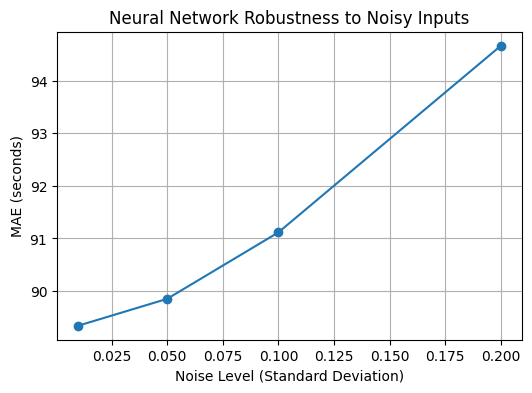


=== Noise Sensitivity ===
Noise 0.01: MAE = 89.339 sec
Noise 0.05: MAE = 89.851 sec
Noise 0.10: MAE = 91.116 sec
Noise 0.20: MAE = 94.668 sec


/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_missing.loc[mask] = np.nan
/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_missing.loc[mask] = np.nan
/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_missing.loc[mask] = np.nan
/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a fut

3407/3407 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_missing.loc[mask] = np.nan
/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_missing.loc[mask] = np.nan
/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_missing.loc[mask] = np.nan
/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a fut

3407/3407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_missing.loc[mask] = np.nan
/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_missing.loc[mask] = np.nan
/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X_missing.loc[mask] = np.nan
/tmp/ipython-input-1850761232.py:62: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a fut

3407/3407 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


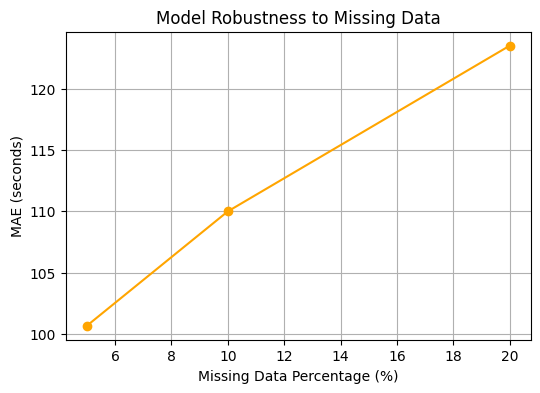


=== Missing Data Sensitivity ===
Missing 5%: MAE = 100.653 sec
Missing 10%: MAE = 109.993 sec
Missing 20%: MAE = 123.526 sec


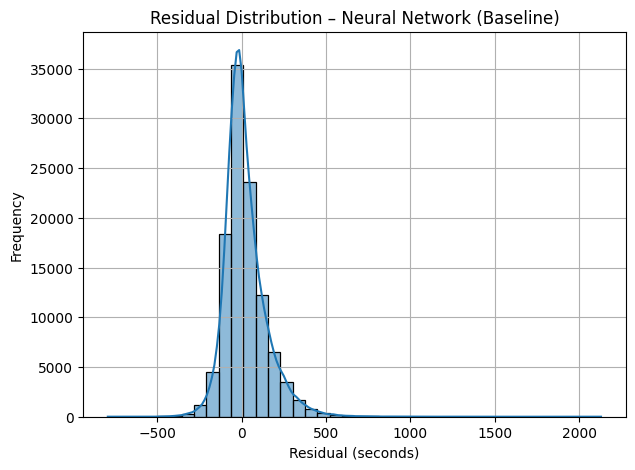


=== Model Diagnostic Summary ===
Baseline MAE: 89.32 sec | R²: 0.57


In [25]:
# D. Model Diagnostics
# ==============================================================
# Assumes you already trained: nn_model, X_train_scaled, X_test_scaled, y_train, y_test, scaler
# and have access to the original unscaled DataFrame with Calendar_date or month if available.
# ==============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

# ==============================================================
# 1️⃣ Evaluate baseline model performance (for comparison)
# ==============================================================
baseline_pred = nn_model.predict(X_test_scaled).flatten()
baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_r2 = r2_score(y_test, baseline_pred)

print("=== Baseline Neural Network Performance ===")
print(f"MAE: {baseline_mae:.3f} seconds")
print(f"R²:  {baseline_r2:.3f}")

# ==============================================================
# 2️⃣ Scenario 1: Robustness to Noise
# ==============================================================
# Add Gaussian noise to test data and re-evaluate
noise_levels = [0.01, 0.05, 0.1, 0.2]  # relative noise levels
mae_noise = []

for noise in noise_levels:
    X_noisy = X_test_scaled.copy()
    X_noisy[continuous_features] = X_noisy[continuous_features] + np.random.normal(
        0, noise, X_noisy[continuous_features].shape
    )
    noisy_pred = nn_model.predict(X_noisy).flatten()
    mae = mean_absolute_error(y_test, noisy_pred)
    mae_noise.append(mae)

plt.figure(figsize=(6, 4))
plt.plot(noise_levels, mae_noise, marker='o')
plt.title("Neural Network Robustness to Noisy Inputs")
plt.xlabel("Noise Level (Standard Deviation)")
plt.ylabel("MAE (seconds)")
plt.grid(True)
plt.show()

print("\n=== Noise Sensitivity ===")
for n, mae in zip(noise_levels, mae_noise):
    print(f"Noise {n:.2f}: MAE = {mae:.3f} sec")

# ==============================================================
# 3️⃣ Scenario 2: Missing Data Simulation
# ==============================================================
# Randomly set 5%, 10%, 20% of continuous features to NaN, impute with mean
missing_rates = [0.05, 0.1, 0.2]
mae_missing = []

for rate in missing_rates:
    X_missing = X_test_scaled.copy()
    mask = np.random.rand(*X_missing[continuous_features].shape) < rate
    X_missing.loc[mask] = np.nan
    X_missing = X_missing.fillna(X_train_scaled.mean())
    miss_pred = nn_model.predict(X_missing).flatten()
    mae = mean_absolute_error(y_test, miss_pred)
    mae_missing.append(mae)

plt.figure(figsize=(6, 4))
plt.plot([r * 100 for r in missing_rates], mae_missing, marker='o', color='orange')
plt.title("Model Robustness to Missing Data")
plt.xlabel("Missing Data Percentage (%)")
plt.ylabel("MAE (seconds)")
plt.grid(True)
plt.show()

print("\n=== Missing Data Sensitivity ===")
for r, mae in zip(missing_rates, mae_missing):
    print(f"Missing {r*100:.0f}%: MAE = {mae:.3f} sec")



# ==============================================================
# 5️⃣ Residual Stability Check (Error Distribution over Time)
# ==============================================================
residuals = y_test - baseline_pred
plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residual Distribution – Neural Network (Baseline)")
plt.xlabel("Residual (seconds)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ==============================================================
# Summary Interpretation
# ==============================================================
print("\n=== Model Diagnostic Summary ===")
print(f"Baseline MAE: {baseline_mae:.2f} sec | R²: {baseline_r2:.2f}")


2400/2400 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3120/3120 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
3275/3275 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3047/3047 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
3001/3001 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
2194/2194 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


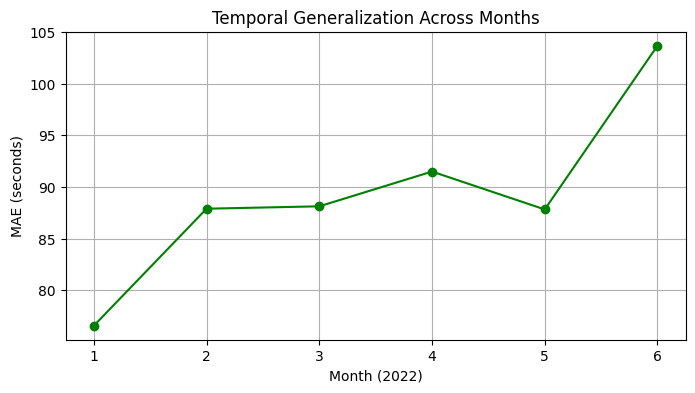


=== Monthly Generalization ===
Month 1: MAE = 76.555 sec
Month 2: MAE = 87.892 sec
Month 3: MAE = 88.124 sec
Month 4: MAE = 91.491 sec
Month 5: MAE = 87.822 sec
Month 6: MAE = 103.683 sec


In [26]:
# ==============================================================
# 4️⃣ Scenario 3: Temporal Generalization (Across Months)
# ==============================================================
# NOTE: Requires a 'Calendar_date' or 'month' column in your dataset
# Example assumes 'Calendar_date' is available in YYYYMMDD format

if "calendar_date" in df.columns:
    df["month"] = pd.to_datetime(df["calendar_date"], format="%Y%m%d").dt.month
    monthly_mae = []

    for month in sorted(df["month"].unique()):
        X_month = df[df["month"] == month][X.columns]
        y_month = df[df["month"] == month][target]
        X_month_scaled = X_month.copy()
        X_month_scaled[continuous_features] = scaler.transform(X_month[continuous_features])
        y_pred_month = nn_model.predict(X_month_scaled).flatten()
        mae_m = mean_absolute_error(y_month, y_pred_month)
        monthly_mae.append((month, mae_m))

    months, mae_vals = zip(*monthly_mae)
    plt.figure(figsize=(8, 4))
    plt.plot(months, mae_vals, marker='o', color='green')
    plt.title("Temporal Generalization Across Months")
    plt.xlabel("Month (2022)")
    plt.ylabel("MAE (seconds)")
    plt.grid(True)
    plt.show()

    print("\n=== Monthly Generalization ===")
    for m, mae in monthly_mae:
        print(f"Month {m}: MAE = {mae:.3f} sec")

In [27]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# === Define evaluation function that returns metrics ===
def get_model_metrics(name, y_true, y_pred):
    return {
        "Model": name,
        "MAE (sec)": mean_absolute_error(y_true, y_pred),
        "RMSE (sec)": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAPE (%)": mean_absolute_percentage_error(y_true, y_pred) * 100,
        "R²": r2_score(y_true, y_pred)
    }

# === Collect metrics for each model ===
results = [
    get_model_metrics("Linear Regression", y_test, lr_pred),
    get_model_metrics("XGBoost", y_test, xgb_pred),
    get_model_metrics("Neural Network", y_test, nn_pred)
]

# === Create DataFrame for comparison ===
results_df = pd.DataFrame(results)
print(results_df.round(3))


               Model  MAE (sec)  RMSE (sec)      MAPE (%)     R²
0  Linear Regression     95.455     129.508  1.355778e+17  0.551
1            XGBoost     87.448     122.863  1.110869e+17  0.596
2     Neural Network     89.317     126.996  9.382173e+16  0.569
